In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

titanic = sns.load_dataset('titanic')

# drop duplicate/analogous columns
titanic = titanic.drop(['alive',
                        'adult_male',
                        'who',
                        'class',
                        'embark_town'], axis=1)

# take care of missing data
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')

# convert binomials and categoricals to encoded labels
for label in ['embarked', 'sex', 'alone']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1


0    22.0
Name: age, dtype: float64
0    7.25
Name: fare, dtype: float64
   survived  pclass  sex  sibsp  parch  fare  embarked  alone
0         0       3    1      1      0  7.25         2      0
   survived  pclass  sex   age  sibsp  parch  embarked  alone
0         0       3    1  22.0      1      0         2      0


/Users/darwinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


ValueError: shapes (1,891) and (8,) not aligned: 891 (dim 1) != 8 (dim 0)

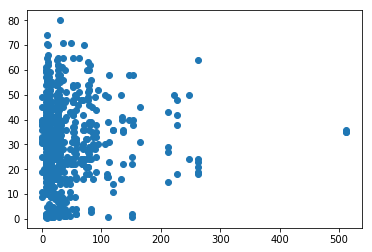

In [28]:
from sklearn import linear_model
import matplotlib.pyplot as plt

Y_actual_ages = titanic['age']
Y_actual_fares = titanic['fare']
X_no_ages = titanic.drop(['age'],axis=1)
X_no_fares = titanic.drop(['fare'],axis=1)

print(Y_actual_ages.head(1))
print(Y_actual_fares.head(1))
print(X_no_ages.head(1))
print(X_no_fares.head(1))


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_no_ages, Y_actual_ages)

# Make ppredictions using the testing set
titanic_predicted_ages  = regr.predict(X_no_ages)

#plt.plot(range(len(titanic_predicted_ages)),titanic_predicted_ages,c='g', marker='.',lineStyle='None')
#plt.plot(range(len(titanic_predicted_ages)),Y_actual_ages,c='r', marker='.',lineStyle='None')

plt.show()
plt.plot(Y_actual_fares, Y_actual_ages, 'o')

coefs = np.polyfit(Y_actual_fares, Y_actual_ages, 1)
#print(coefs)
regr.fit(Y_actual_fares.reshape(891,1),Y_actual_ages.reshape(-1,1))
one_dimensional_age_predictions = regr.predict(Y_actual_fares.reshape(-1,1))



#print(titanic_predicted_ages[0])
#print(Y_actual_ages[0])
#print(titanic_predicted_ages-Y_actual_ages)


one_dimensional_age_predictions = regr.predict(Y_actual_fares.reshape(891,1).T)
regr.fit(Y_actual_ages.reshape(891,1), Y_actual_fares.reshape(891,1))

plt.plot(Y_actual_fares,one_dimensional_age_predictions,'g')

fare_pred_age_sse = np.sum(one_dimensional_age_predictions-Y_actual_ages)**2
print(fare_pred_age_sse)

regr.fit(X_no_ages,Y_actual_ages.reshape(1,-1))
full_dimension_age_predictions = regr.predict(X_no_ages)

age_pred_sse = np.sum((full_dimension_age_predictions-Y_actual_ages.reshape(-1,1))**2)
print(age_pred_sse)